In [1]:
library(gprofiler2)
library(ggplot2)
library(RColorBrewer)

In [4]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/gene_expression_correlation_cluster_summaries.csv"
df = read.csv(filename, row.names=1)

Warning message in file(file, "rt"):
“cannot open file '/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/gene_expression_correlation_cluster_summaries.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [3]:
colnames(df) = paste0("cluster",0:(ncol(df)-1))
head(df,2)

,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11
HPSI0114i-bezi_3--DA--d30--0,0.4492843,-0.7952382,-0.4816106,0.8658570,-0.1223015,0.0950069,1.109847,0.4850352,-0.16113688,-0.4720093,0.2110775,-0.5376197
HPSI0114i-bezi_3--DA--d30--1,0.5092915,-0.8019595,-0.5017370,0.9154453,0.1000676,0.2789833,1.170581,0.6114963,-0.07019794,-0.5283503,0.2034086,-0.6379603


In [ ]:
########### Genes positively correlated with cluster summary profiles

In [193]:
df_list = list()
for (i in 1:ncol(df)){
    gene_list = df[,i]
    names(gene_list) = rownames(df)
    # get positively correlated genes
    genes_pos = gene_list[gene_list>0.5]
    if (length(genes_pos)==0){next}
    # order
    genes_pos = genes_pos[order(genes_pos, decreasing = T)]
    # get gene names only
    genes = gsub(".*_","",names(genes_pos))
    # run gprofiler
    gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=FALSE)
    df_list[[i]] = as.data.frame(gres$result)
}

In [196]:
pats = c()
for (i in 1:length(df_list)){
    if (is.null(df_list[[i]])){next}
    df_curr = as.data.frame(df_list[[i]])
    df_curr = df_curr[df_curr$p_value < 0.05/17,]
#     print(nrow(df_curr))
    n = min(10, nrow(df_curr))
    pats = c(pats, unique(df_curr[1:n,"term_name"]))
}

[1] 12
[1] 0
[1] 39
[1] 0
[1] 2
[1] 3
[1] 0
[1] 47
[1] 0
[1] 45
[1] 11
[1] 48
[1] 0
[1] 0


In [197]:
length(pats)

[1] 71

In [198]:
df_to_plot = data.frame()
for (i in 1:length(df_list)){
    cluster = paste0("cluster",(i-1))
    df_curr = df_list[[i]]
    if (is.null(df_curr)){next}
    df_curr$cluster = cluster
    df_to_plot = rbind(df_to_plot, df_curr[df_curr$term_name %in% pats,
                                           c("p_value","cluster","term_name","term_id")])
}

In [199]:
# df_to_plot

,p_value,cluster,term_name,term_id
1,1.459786e-05,cluster0,endodermal cell differentiation,GO:0035987
2,2.551694e-05,cluster0,endoderm formation,GO:0001706
3,8.452151e-05,cluster0,endoderm development,GO:0007492
4,1.653435e-04,cluster0,gastrulation,GO:0007369
5,3.190378e-04,cluster0,formation of primary germ layer,GO:0001704
6,3.943233e-04,cluster0,mesoderm development,GO:0007498
7,2.235870e-03,cluster0,cell migration involved in gastrulation,GO:0042074
8,2.726896e-03,cluster0,cell fate specification,GO:0001708
10,1.738012e-02,cluster0,embryonic morphogenesis,GO:0048598
26,1.531880e-01,cluster0,digestive tract development,GO:0048565


In [204]:
unique(df_to_plot$cluster)
df_to_plot$cluster <- factor(df_to_plot$cluster, 
                             levels = c("cluster13", "cluster9", "cluster3", "cluster16", 
                                        "cluster12", "cluster4", "cluster6", "cluster2",
                                       "cluster7", "cluster0", "cluster11", "cluster14",
                                       "cluster8", "cluster15"))

[1] "cluster0"  "cluster2"  "cluster3"  "cluster4"  "cluster6"  "cluster7" 
 [7] "cluster8"  "cluster9"  "cluster11" "cluster12" "cluster13" "cluster14"
[13] "cluster15" "cluster16"

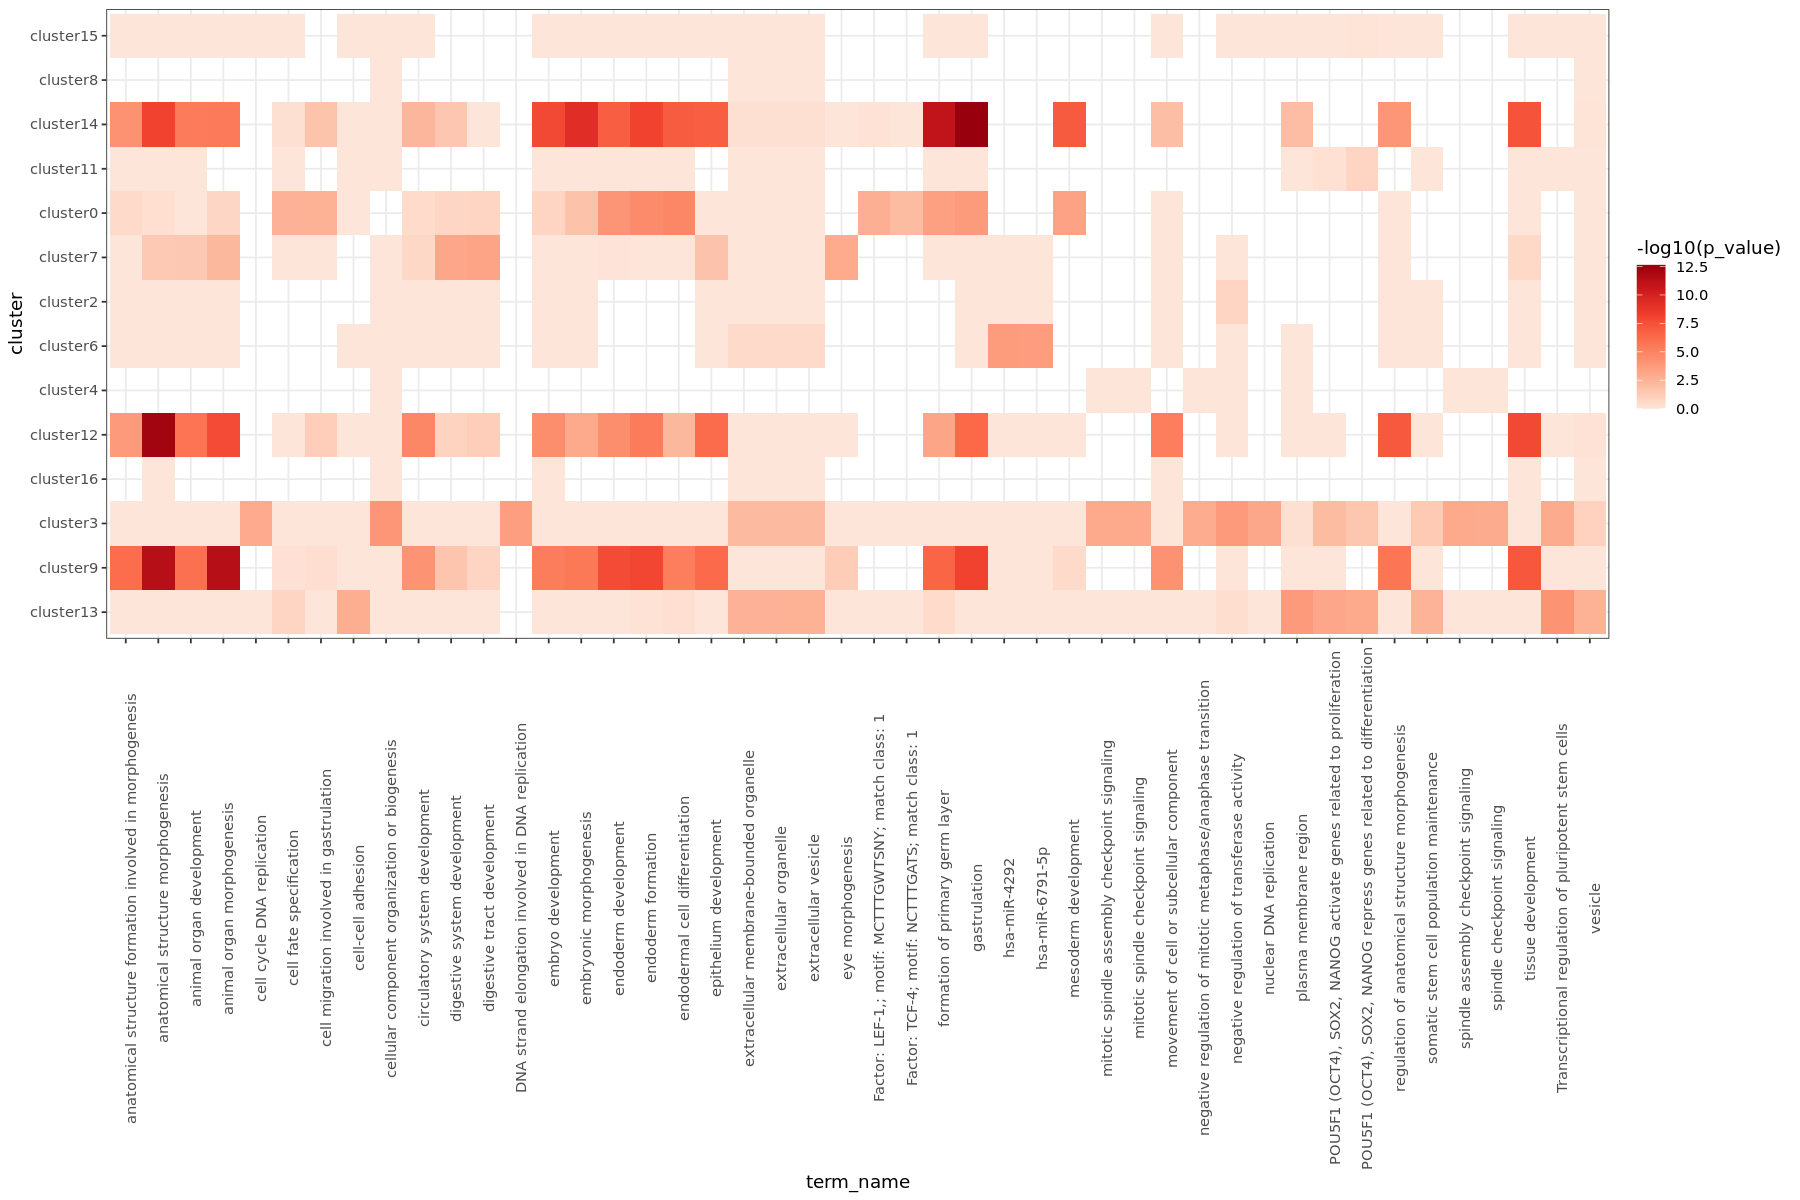

In [218]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(df_to_plot, aes(x=term_name, y=cluster, fill = -log10(p_value))) + geom_tile() + 
    theme_bw() + theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_gradientn(colors = brewer.pal(7,"Reds"))

In [ ]:
########### Genes negatively correlated with cluster summary profiles

In [228]:
df_list = list()
for (i in 1:ncol(df)){
    gene_list = df[,i]
    names(gene_list) = rownames(df)
#     print(head(gene_list))
    # get negatively correlated genes
    genes_neg = gene_list[gene_list<(-0.5)]
    if (length(genes_neg)==0){next}
    # order
    genes_neg = genes_neg[order(genes_neg)]
    # get gene names only
    genes = gsub(".*_","",names(genes_neg))
    # run gprofiler
    gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=FALSE)
    df_list[[i]] = as.data.frame(gres$result)
}

In [229]:
pats = c()
for (i in 1:length(df_list)){
    if (is.null(df_list[[i]])){next}
    df_curr = as.data.frame(df_list[[i]])
    df_curr = df_curr[df_curr$p_value < 0.05/17,]
#     print(nrow(df_curr))
    n = min(10, nrow(df_curr))
    pats = c(pats, unique(df_curr[1:n,"term_name"]))
}
length(pats)

[1] 53

In [230]:
df_to_plot = data.frame()
for (i in 1:length(df_list)){
    cluster = paste0("cluster",(i-1))
    df_curr = df_list[[i]]
    if (is.null(df_curr)){next}
    df_curr$cluster = cluster
    df_to_plot = rbind(df_to_plot, df_curr[df_curr$term_name %in% pats,
                                           c("p_value","cluster","term_name","term_id")])
}

In [232]:
unique(df_to_plot$cluster)
df_to_plot$cluster <- factor(df_to_plot$cluster, 
                             levels = c("cluster13", "cluster9", "cluster3", "cluster16", 
                                        "cluster12", "cluster4", "cluster6", "cluster7", 
                                        "cluster0", "cluster11", "cluster14","cluster5", "cluster15"))

[1] "cluster0"  "cluster3"  "cluster4"  "cluster5"  "cluster6"  "cluster7" 
 [7] "cluster9"  "cluster11" "cluster12" "cluster13" "cluster14" "cluster15"
[13] "cluster16"

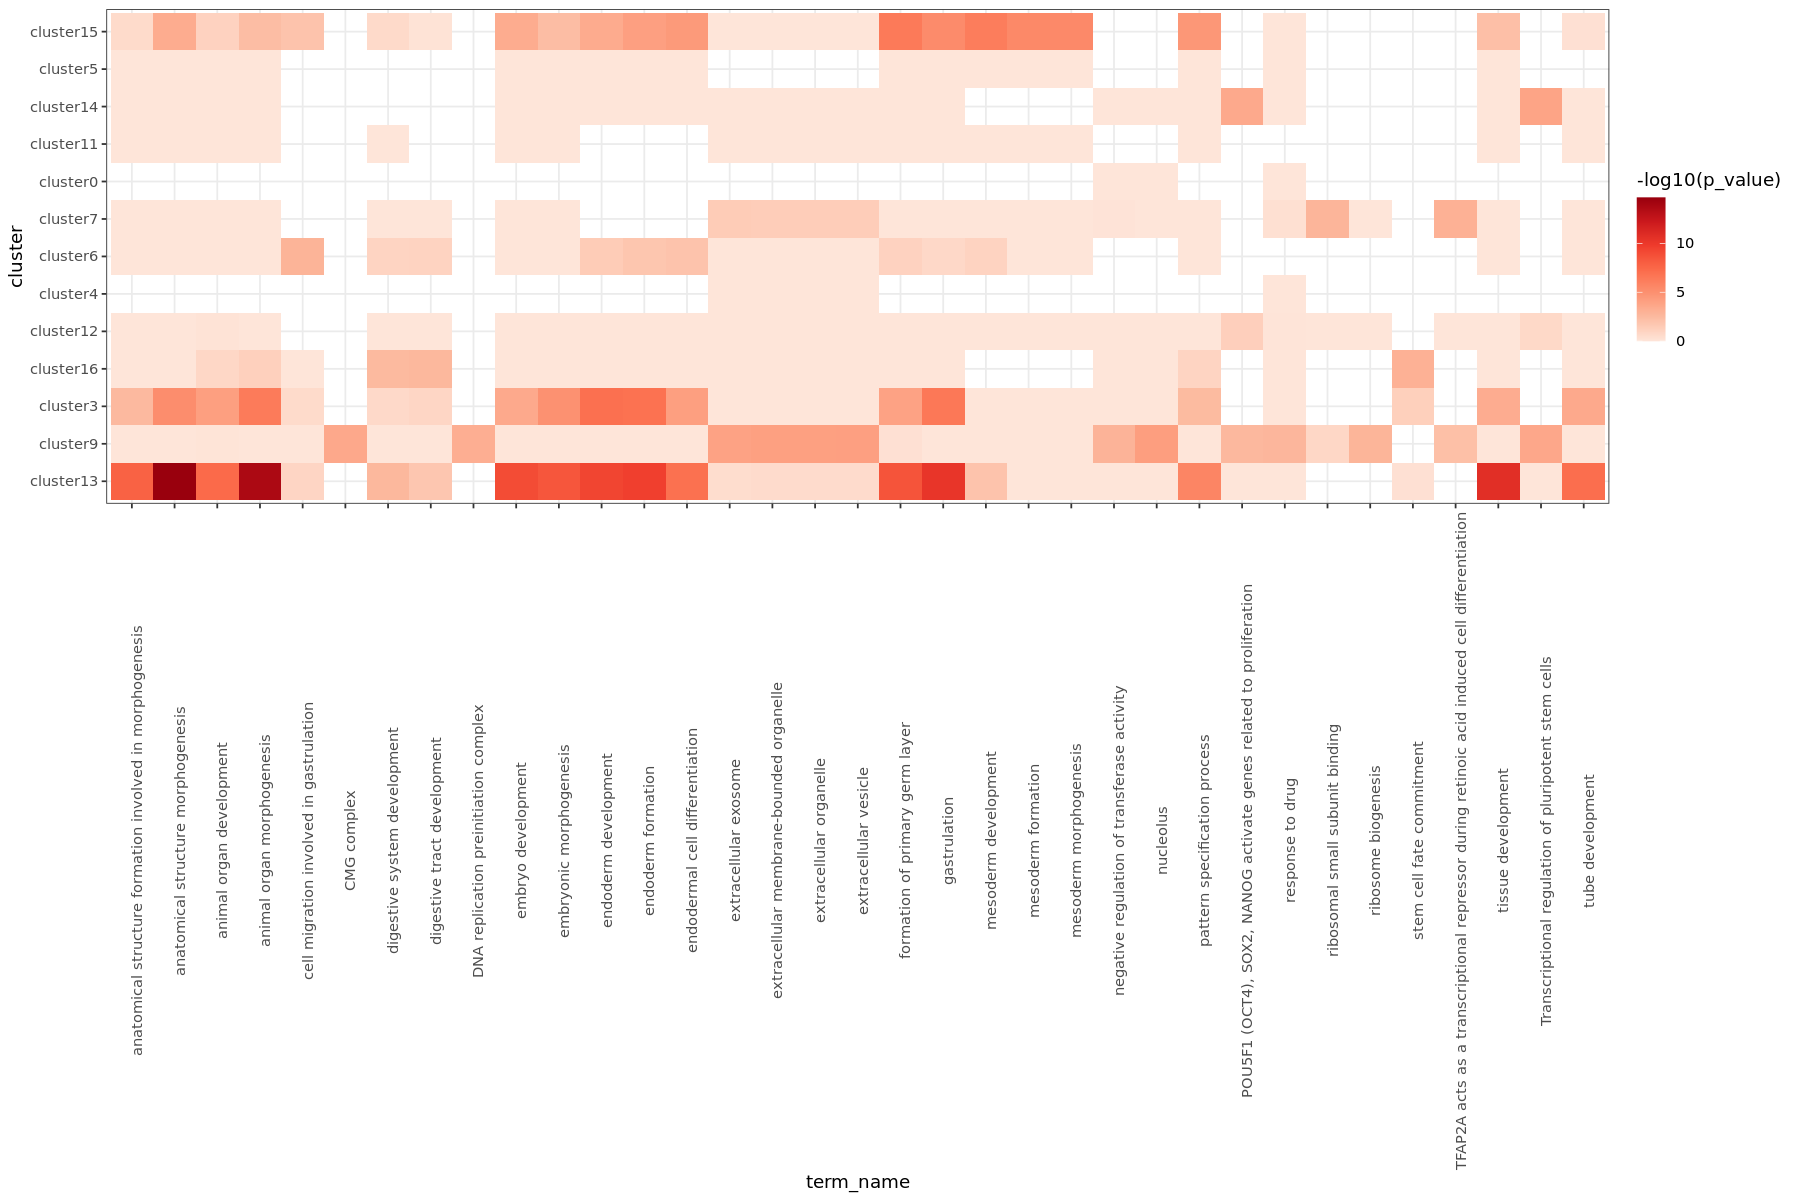

In [233]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(df_to_plot, aes(x=term_name, y=cluster, fill = -log10(p_value))) + geom_tile() + 
    theme_bw() + theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_gradientn(colors = brewer.pal(7,"Reds"))

In [ ]:
########### Genes either positively or negatively correlated with cluster summary profiles

In [246]:
df_list = list()
for (i in 1:ncol(df)){
    gene_list = df[,i]
    names(gene_list) = rownames(df)
    # get positively correlated genes
    genes_pos = gene_list[gene_list>0.5]
    # AND negatively correlated genes
    genes_neg = gene_list[gene_list<(-0.5)]
    genes_corr = c(genes_pos, genes_neg)
    genes_corr = abs(genes_corr)
    if (length(genes_corr)==0){next}
    # order
    genes_corr = genes_corr[order(genes_corr,decreasing=TRUE)]
    # get gene names only
    genes = gsub(".*_","",names(genes_corr))
    # run gprofiler
    gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=FALSE)
    df_list[[i]] = as.data.frame(gres$result)
}

In [247]:
pats = c()
for (i in 1:length(df_list)){
    if (is.null(df_list[[i]])){next}
    df_curr = as.data.frame(df_list[[i]])
    df_curr = df_curr[df_curr$p_value < 0.05/17,]
#     print(nrow(df_curr))
    n = min(10, nrow(df_curr))
    pats = c(pats, unique(df_curr[1:n,"term_name"]))
}
length(pats)

[1] 82

In [248]:
df_to_plot = data.frame()
for (i in 1:length(df_list)){
    cluster = paste0("cluster",(i-1))
    df_curr = df_list[[i]]
    if (is.null(df_curr)){next}
    df_curr$cluster = cluster
    df_to_plot = rbind(df_to_plot, df_curr[df_curr$term_name %in% pats,
                                           c("p_value","cluster","term_name","term_id")])
}

In [250]:
unique(df_to_plot$cluster)
df_to_plot$cluster <- factor(df_to_plot$cluster, 
                             levels = c("cluster13", "cluster9", "cluster3", "cluster16", 
                                        "cluster12", "cluster4", "cluster6", "cluster2", "cluster7", 
                                        "cluster0", "cluster11", "cluster14","cluster5", "cluster15"))

[1] "cluster0"  "cluster2"  "cluster3"  "cluster4"  "cluster5"  "cluster6" 
 [7] "cluster7"  "cluster9"  "cluster11" "cluster12" "cluster13" "cluster14"
[13] "cluster15" "cluster16"

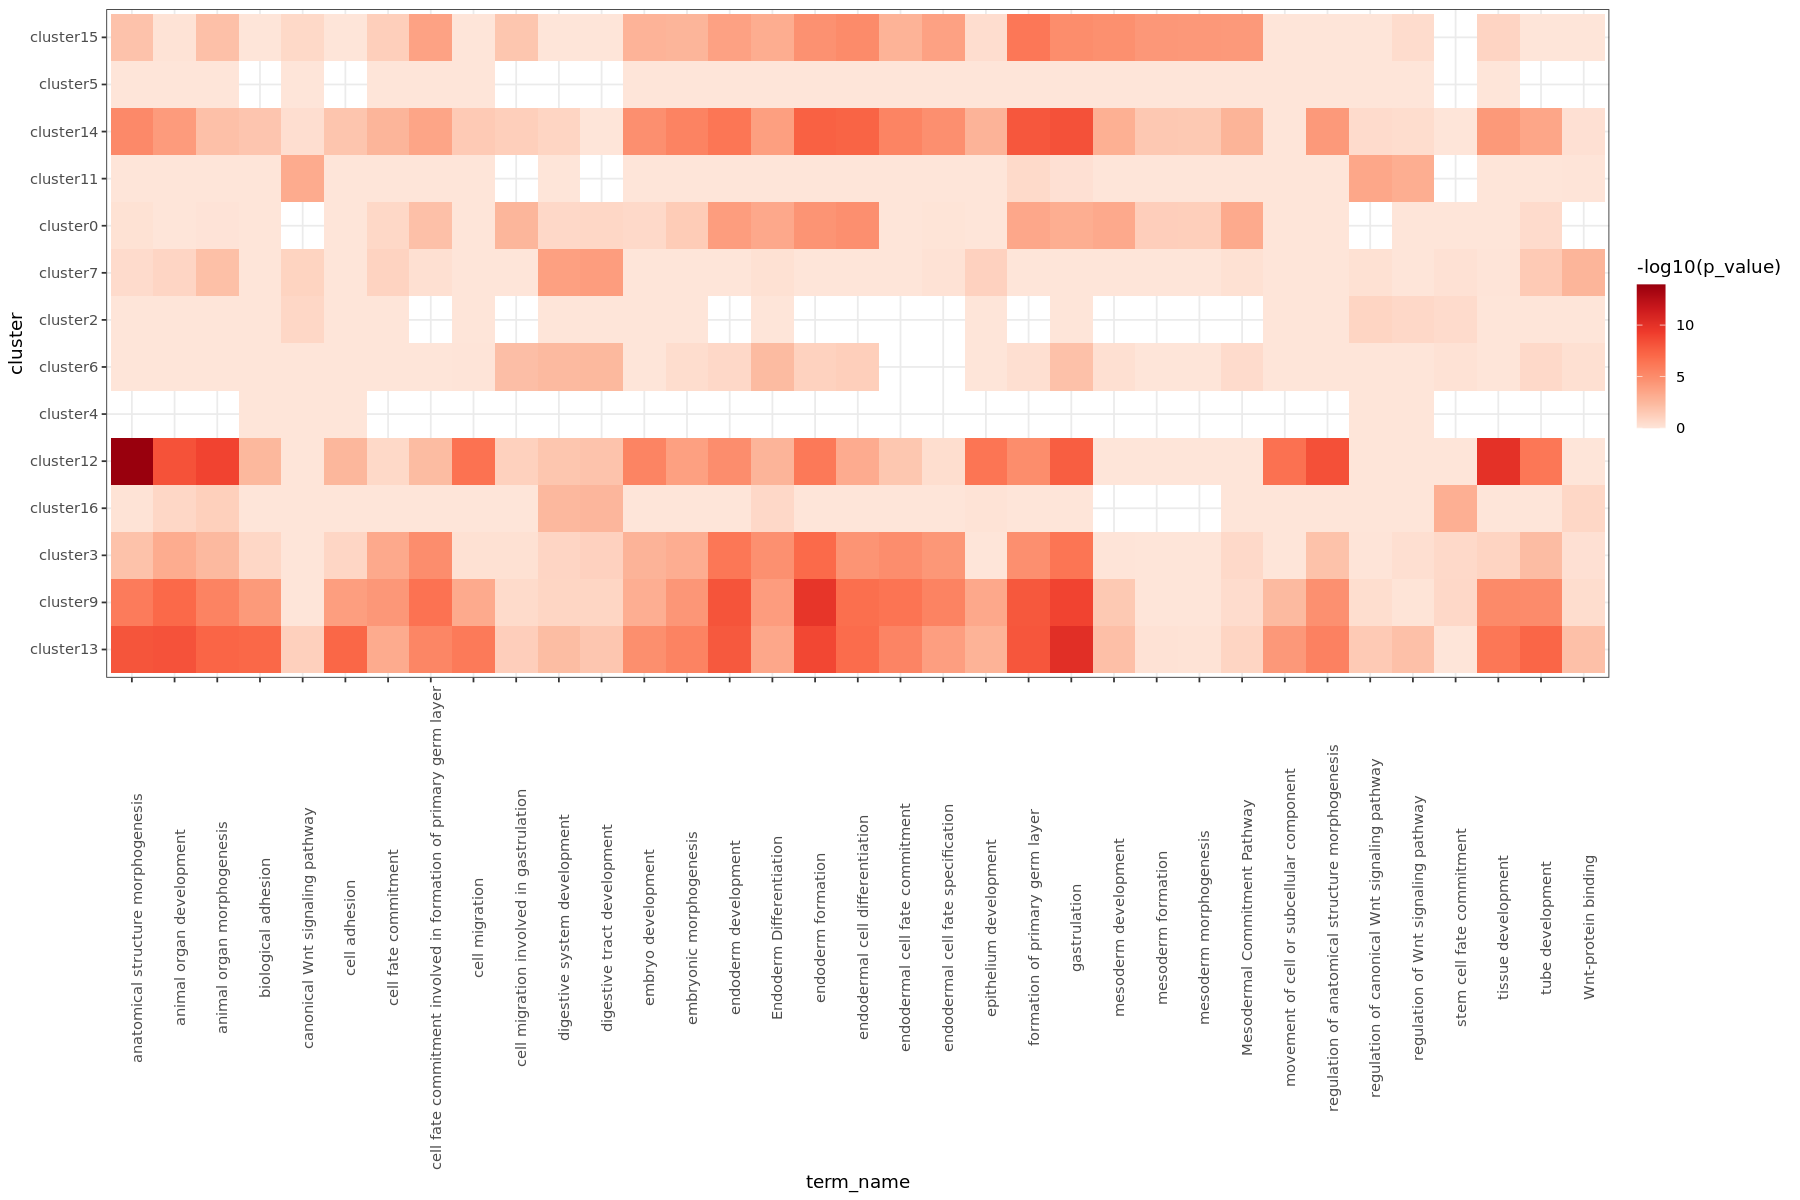

In [251]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(df_to_plot, aes(x=term_name, y=cluster, fill = -log10(p_value))) + geom_tile() + 
    theme_bw() + theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_gradientn(colors = brewer.pal(7,"Reds"))